In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import regression as reg

In [45]:
def load_data():
    df = pd.read_csv('../data/input/kc_house_data_cleaned.csv')

    X = df[df.columns[0:15]].to_numpy()
    one = np.ones((X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = df['price'].to_numpy()
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y = y.reshape((X.shape[0], 1))

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train, X_test, y_train, y_test = load_data()
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_train: {y_test.shape}')

X_train: (17277, 16), y_train: (17277, 1)
X_test: (4320, 16), y_train: (4320, 1)


In [47]:
print(y_test)

[[0.00715035]
 [0.04421412]
 [0.05457885]
 ...
 [0.0471005 ]
 [0.02820782]
 [0.02826909]]


Newton method

In [48]:
# w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))
# w = w_init
# t = 0.5
# cost = []
# grad_norm = []
# count = 0
# for i in range(50):
#     grad = reg.gradient(w, X_train, y_train)
#     H = reg.hessian(X_train)
#     p = reg.cal_direction(H, -grad)
#     w = reg.update(w, t, p)
#     cost.append(reg.cost_func(w, X_train, y_train))
#     grn = np.linalg.norm(grad)
#     grad_norm.append(grn)
#     if grn < 1e-4:
#         count = i
#         break


In [49]:
# y_pred = reg.predict(X_test, w)
# total_var = np.sum((y_pred[:,0] - y_test[:, 0])**2)
# print(total_var)

# ratio = total_var / np.sum(y_test[:, 0]**2)
# print(ratio)

In [50]:
# import matplotlib.pyplot as plt

# # print(cost)

# plt.plot(range(len(cost)), cost)
# plt.title(f'Loss function', fontsize=16)
# plt.ylabel('Value', fontsize=16)
# plt.xlabel('Count', fontsize=16)
# plt.show()

# plt.plot(range(len(grad_norm)), grad_norm)
# plt.title(f'Gradient norm', fontsize=16)
# plt.ylabel('Value', fontsize=16)
# plt.xlabel('Count', fontsize=16)
# plt.show()

In [51]:
# print(f'count: {count}, gradient norm: {grad_norm[-1]}')

In [52]:
# w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))
# w = w_init
# t = 0.5
# cost = []
# grad_norm = []
# count = 0

# w1 = reg.update(w, t, reg.gradient(w, X_train, y_train))

# w = [w_init, w1]

# for i in range(2, 50):
#     # v = w[1] + (i - 2)/(i + 1) * (w[1] - w[0])
#     v = w[1]
#     w[0] = w[1]
#     grad = reg.gradient(v, X_train, y_train)
#     w[1] = reg.update(v, t, -grad)
#     cost.append(reg.cost_func(w[1], X_train, y_train))
#     grn = np.linalg.norm(grad)
#     grad_norm.append(grn)
#     if grn < 1e-4:
#         count = i
#         break

In [54]:
w_init = np.repeat(1, X_train.shape[1]).reshape((X_train.shape[1], 1))
w = w_init
t = 0.0005
cost = []
grad_norm = []
count = 0

for i in range(50):
    grad = reg.gradient(w, X_train, y_train)
    w = w - t * grad
    cost.append(reg.cost_func(w, X_train, y_train))
    grn = np.linalg.norm(grad)
    grad_norm.append(grn)
    if grn < 1e-4:
        count = i
        break

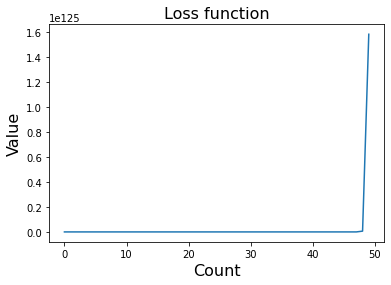

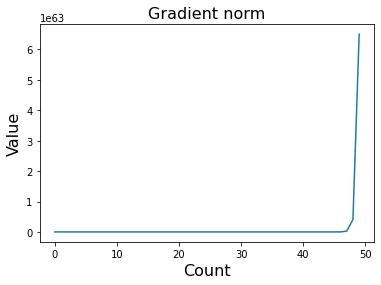

In [55]:
import matplotlib.pyplot as plt

# print(cost)

plt.plot(range(len(cost)), cost)
plt.title(f'Loss function', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

plt.plot(range(len(grad_norm)), grad_norm)
plt.title(f'Gradient norm', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

In [ ]:
import matplotlib.pyplot as plt

# print(cost)

plt.plot(range(len(cost)), cost)
plt.title(f'Loss function', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

plt.plot(range(len(grad_norm)), grad_norm)
plt.title(f'Gradient norm', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')